# 다항분류(소프트맥스)

## #01. 패키지 설치

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

## #02. 데이터셋 준비

In [2]:
origin = pd.read_excel('https://data.hossam.kr/F03/wine_3type.xlsx')
print(origin.info())
origin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  kind 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,kind
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,class_0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,class_0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,class_0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,class_0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,class_0


## #03. 데이터 전처리

### 결측치 확인

In [3]:
origin.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
kind                            0
dtype: int64

### 명목형 변수 형변환

In [4]:
origin['kind'] = origin['kind'].astype('category')
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   alcohol                       178 non-null    float64 
 1   malic_acid                    178 non-null    float64 
 2   ash                           178 non-null    float64 
 3   alcalinity_of_ash             178 non-null    float64 
 4   magnesium                     178 non-null    int64   
 5   total_phenols                 178 non-null    float64 
 6   flavanoids                    178 non-null    float64 
 7   nonflavanoid_phenols          178 non-null    float64 
 8   proanthocyanins               178 non-null    float64 
 9   color_intensity               178 non-null    float64 
 10  hue                           178 non-null    float64 
 11  od280/od315_of_diluted_wines  178 non-null    float64 
 12  proline                       178 non-null    int6

## #04. 탐색적 데이터 분석
### 기초통계량 확인

In [5]:
origin.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


> 칼럼들의 평균 간 분포가 차이가 난다

### 상자그림 확인

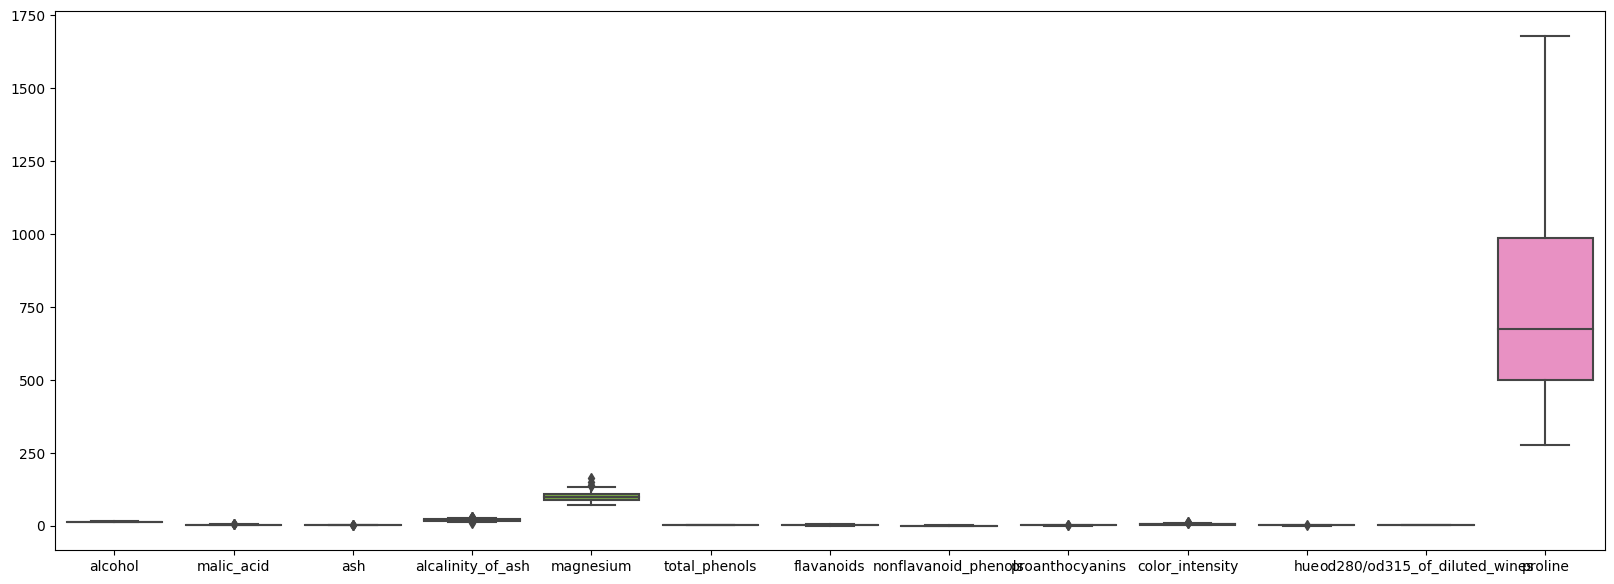

In [6]:
plt.figure(figsize=(20,7))
sb.boxplot(origin)
plt.show()
plt.close()

> 데이터 분포가 상이하다 => 표준화를 진행시켜야 함!

## #05. 데이터셋 분리

### 랜덤시드 고정

In [7]:
np.random.seed(777)

### 훈련데이터와 레이블 분리

In [8]:
x = origin.drop('kind', axis=1)
y = origin[['kind']]

x.shape, y.shape

((178, 13), (178, 1))

### 훈련데이터의 표준화

In [10]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)
x_scale_df = pd.DataFrame(x_scale, index=x.index, columns=x.columns)
x_scale_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### 종속변수(레이블)의 one-hot-encoding

In [12]:
y.value_counts()

kind   
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

In [13]:
y['kind'] = y['kind'].map({'class_0': 0, 'class_1':1, 'class_2':2})
y

C:\Users\hanjieun_2\AppData\Local\Temp\ipykernel_13172\3493066431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['kind'] = y['kind'].map({'class_0': 0, 'class_1':1, 'class_2':2})


,kind
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_cate = to_categorical(y)
y_cate

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

### 훈련데이터와 검증데이터 분할

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_scale_df, y_cate, test_size=0.3, random_state=777)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

x_train

(124, 13) (54, 13) (124, 3) (54, 3)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
124,-1.396613,1.771674,0.085839,0.451946,-1.245695,0.905137,1.004700,-1.223610,2.311176,-0.976782,-0.910151,1.452436,-1.168369
136,-0.927212,2.139716,0.634140,0.451946,-0.754202,-1.466313,-1.565455,1.354888,-1.385721,-0.522583,-0.910151,-1.895054,-0.085641
162,-0.186053,0.838105,0.780354,0.752231,0.439425,-1.033684,-1.434939,1.918935,-1.105388,0.225763,-0.383670,-0.708602,-0.563315
27,0.369816,-0.553273,-0.827996,-0.749194,-0.403135,0.168065,0.161368,-0.740141,-0.422075,-0.479326,0.274431,0.223610,1.713598
35,0.592164,-0.472483,0.158946,0.301803,0.018145,0.648764,0.954502,-0.820719,0.471488,0.018129,0.362177,1.212320,0.551257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-1.668371,-0.598156,0.926567,1.953371,-0.824415,-0.601054,-0.420933,0.307374,-0.439596,-1.063296,1.766126,0.845085,-0.588791
166,0.555106,1.224100,0.853460,1.052516,0.790492,-0.953567,-1.113670,0.549108,-0.229346,2.431870,-0.471417,-1.485445,-0.165254
59,-0.778980,-1.253450,-3.679162,-2.671018,-0.824415,-0.504914,-1.465058,-0.659563,-2.051513,-1.344466,0.406051,-1.118210,-0.722540
47,1.110975,-0.589180,-0.901103,-1.049479,0.088358,1.289697,1.366128,-1.223610,0.962071,0.450699,-0.208177,1.014578,0.758249


## #06. 모델 생성

In [20]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(len(x_train.columns), )))
model.add(Dense(3, activation ='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 


 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1091 (4.26 KB)
Trainable params: 1091 (4.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
result = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test),
                   callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1),
                              ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, min_lr=0.0001, factor=0.5)])

Epoch 1/500
4/4 [==============================] - 1s 74ms/step - loss: 0.9715 - acc: 0.5000 - val_loss: 0.8871 - val_acc: 0.6296 - lr: 0.0010
Epoch 2/500
4/4 [==============================] - 0s 16ms/step - loss: 0.8714 - acc: 0.6371 - val_loss: 0.8002 - val_acc: 0.7222 - lr: 0.0010
Epoch 3/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7831 - acc: 0.7984 - val_loss: 0.7226 - val_acc: 0.8148 - lr: 0.0010
Epoch 4/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7058 - acc: 0.8306 - val_loss: 0.6532 - val_acc: 0.8889 - lr: 0.0010
Epoch 5/500
4/4 [==============================] - 0s 15ms/step - loss: 0.6337 - acc: 0.8468 - val_loss: 0.5926 - val_acc: 0.9259 - lr: 0.0010
Epoch 6/500
4/4 [==============================] - 0s 15ms/step - loss: 0.5715 - acc: 0.9032 - val_loss: 0.5396 - val_acc: 0.9444 - lr: 0.0010
Epoch 7/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5159 - acc: 0.9032 - val_loss: 0.4931 - val_acc: 0.9630 - lr: 0.0010

## #07. 학습 모델 평가

In [23]:
# 결과 데이터 프레임 만들기
result_df = pd.DataFrame(result.history)
result_df['epochs'] = result_df.index + 1
result_df

,loss,acc,val_loss,val_acc,lr,epochs
0,0.971488,0.500000,0.887131,0.629630,0.0010,1
1,0.871410,0.637097,0.800194,0.722222,0.0010,2
2,0.783056,0.798387,0.722575,0.814815,0.0010,3
3,0.705843,0.830645,0.653175,0.888889,0.0010,4
4,0.633717,0.846774,0.592576,0.925926,0.0010,5
...,...,...,...,...,...,...
104,0.012987,1.000000,0.094780,0.962963,0.0010,105
105,0.012728,1.000000,0.094838,0.962963,0.0010,106
106,0.012517,1.000000,0.094866,0.962963,0.0010,107
107,0.012295,1.000000,0.094852,0.962963,0.0005,108


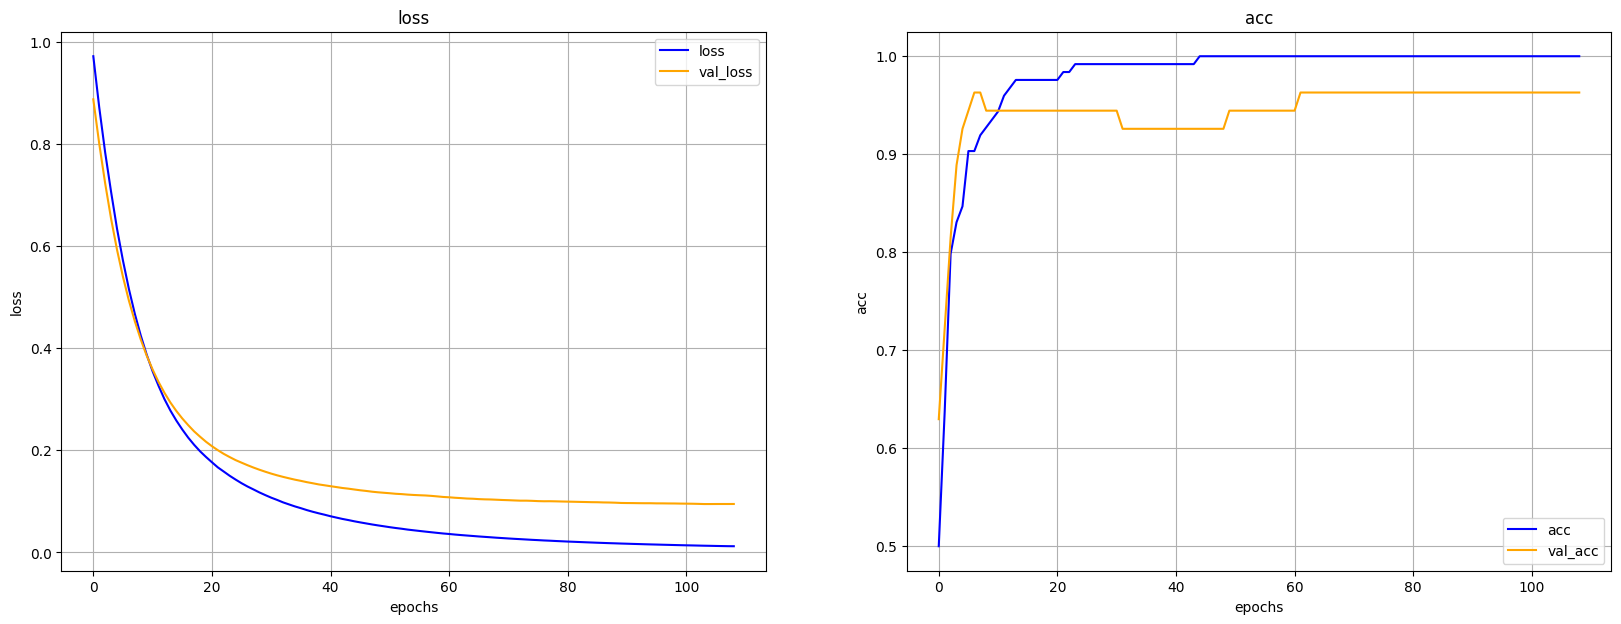

In [24]:
# 손실률과 정확도 시각화

# 학습 결과 그래프의 컬럼명
column_names = result_df.columns

# 학습데이터에 대한 필드이름
train_column_name = [column_names[0], column_names[1]]
# 검증데이터에 대한 필드이름
test_column_name = [column_names[2], column_names[3]]

# 학습 결과 그래프
fig, ax = plt.subplots(1,2, figsize=(20,7))

for i, v in enumerate(ax):
    sb.lineplot(data=result_df, x=result_df.index, y=train_column_name[i], color='blue', label=train_column_name[i], ax=v)
    sb.lineplot(data=result_df, x=result_df.index, y=test_column_name[i], color='orange', label=test_column_name[i], ax=v)
    v.set_title(train_column_name[i])
    v.set_xlabel('epochs')
    v.set_ylabel(train_column_name[i])
    v.grid()
    v.legend()

plt.show()
plt.close()

In [25]:
# 학습모델 평가
evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률 : %f, 최종 훈련 정확도 : %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률 : %f, 최종 검증 정확도 : %f" % (evaluate2[0], evaluate2[1]))

4/4 [==============================] - 0s 3ms/step - loss: 0.0121 - acc: 1.0000
최종 훈련 손실률 : 0.012120, 최종 훈련 정확도 : 1.000000
2/2 [==============================] - 0s 16ms/step - loss: 0.0949 - acc: 0.9630
최종 검증 손실률 : 0.094907, 최종 검증 정확도 : 0.962963


## #08. 학습 모델 적용

### 훈련데이터에 대한 예측값 생성

In [26]:
train_pred = model.predict(x_train)
data_count, case_count = train_pred.shape
print("%d개의 훈련데이터가 %d개의 경우의 수를 갖는다" % (data_count, case_count))
print(train_pred)

4/4 [==============================] - 0s 1ms/step
124개의 훈련데이터가 3개의 경우의 수를 갖는다
[[2.16237109e-04 9.99636292e-01 1.47448241e-04]
 [4.82477044e-04 1.46046644e-02 9.84912813e-01]
 [2.62483512e-03 2.39295680e-02 9.73445594e-01]
 [9.73870277e-01 1.87823121e-02 7.34735979e-03]
 [9.84656870e-01 1.33852158e-02 1.95793342e-03]
 [9.99902487e-01 6.40311700e-05 3.35167242e-05]
 [1.32901373e-03 3.39850201e-03 9.95272458e-01]
 [1.87015056e-03 9.97413218e-01 7.16586539e-04]
 [2.78818747e-03 8.54422212e-01 1.42789617e-01]
 [5.57631208e-03 9.92508948e-01 1.91470166e-03]
 [8.07731412e-04 2.14213762e-03 9.97050047e-01]
 [4.87218931e-05 8.58552696e-04 9.99092698e-01]
 [2.38913181e-03 2.40318989e-03 9.95207727e-01]
 [2.89278477e-03 3.79010141e-02 9.59206164e-01]
 [1.33458711e-03 9.90863502e-01 7.80183217e-03]
 [9.99855280e-01 6.36176046e-05 8.10031052e-05]
 [2.38963490e-04 2.44552107e-03 9.97315466e-01]
 [4.63986769e-03 9.95093822e-01 2.66261777e-04]
 [4.44225501e-04 3.40985786e-03 9.96145964e-01]
 [2.62960

In [33]:
train_df = pd.DataFrame({
    '관측치' : y_train.flatten(),
    '예측치' : np.round(train_pred.flatten())
})

train_df

,관측치,예측치
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
367,0.0,0.0
368,0.0,0.0
369,0.0,0.0
370,1.0,1.0


### 검증데이터에 대한 예측결과 산정

In [34]:
test_pred = model.predict(x_test)
data_count, case_count = test_pred.shape
print("%d개의 검증데이터가 %d개의 경우의 수를 갖는다" % (data_count, case_count))
print(test_pred)

2/2 [==============================] - 0s 2ms/step
54개의 검증데이터가 3개의 경우의 수를 갖는다
[[9.9716431e-01 1.9592370e-03 8.7641273e-04]
 [6.3501221e-01 3.2292861e-01 4.2059187e-02]
 [5.9168017e-03 4.3536872e-02 9.5054626e-01]
 [2.3641032e-03 9.8186928e-01 1.5766596e-02]
 [9.9999475e-01 2.0336215e-06 3.1784825e-06]
 [9.9932420e-01 5.8185396e-04 9.4050942e-05]
 [1.9489789e-04 9.9891317e-01 8.9195411e-04]
 [9.9934107e-01 3.8928373e-04 2.6953456e-04]
 [5.8350828e-04 9.9840027e-01 1.0161756e-03]
 [1.8790708e-04 1.2776102e-03 9.9853444e-01]
 [3.7197143e-04 3.7196715e-04 9.9925607e-01]
 [2.1654351e-04 4.8242797e-05 9.9973518e-01]
 [9.9930990e-01 4.7499136e-04 2.1518601e-04]
 [5.7627647e-03 9.8851156e-01 5.7257684e-03]
 [7.2279792e-05 8.1675113e-05 9.9984598e-01]
 [1.9299483e-05 2.8100112e-05 9.9995255e-01]
 [7.1037054e-04 3.7865402e-04 9.9891102e-01]
 [3.9413679e-01 6.0112941e-01 4.7338274e-03]
 [2.2913361e-02 5.9174037e-01 3.8534623e-01]
 [3.9657641e-02 9.5901620e-01 1.3261365e-03]
 [8.0042315e-05 9.9966

In [35]:
test_df = pd.DataFrame({
    '관측치': y_test.flatten(),
    '예측치': np.round(test_pred.flatten())
})
test_df

,관측치,예측치
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
157,0.0,0.0
158,0.0,0.0
159,1.0,1.0
160,0.0,0.0


### 결과 확인

#### 1) 훈련데이터

##### 예측값 생성

In [36]:
pred_bool = model.predict(x_train).flatten() > 0.5
pred = pred_bool.astype(int)
pred

4/4 [==============================] - 0s 2ms/step


array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,

##### 혼동행렬 구하기

In [37]:
from sklearn.metrics import confusion_matrix

In [39]:
cm = confusion_matrix(y_train.flatten(), pred)
tn, fp, fn, tp = cm.ravel()
cmdf = pd.DataFrame([[tn,fn], [fp, tp]], index=['True', 'False'], columns=['Negative', 'Positive'])
cmdf

,Negative,Positive
True,248,0
False,0,124


##### 위양성률, 재현율, 정확도, 정밀도, F1 score

In [40]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score

In [42]:
result_df2 = pd.DataFrame({
    '정확도' : accuracy_score(y_train.flatten(), pred),
    '정밀도': precision_score(y_train.flatten(),pred),
    '재현율(Recall, TPR)':recall_score(y_train.flatten(), pred),
    '위양성율(Fallout, FPR)' : fp / (fp+tn),
    '특이성(Specificity, TNR)' : 1 - (fp / (fp+tn)),
    'RAS' : roc_auc_score(y_train.flatten(), pred),
    'f1_score': f1_score(y_train.flatten(), pred)
}, index = result_df.index)

result_df2.head().T

,0,1,2,3,4
정확도,1.0,1.0,1.0,1.0,1.0
정밀도,1.0,1.0,1.0,1.0,1.0
"재현율(Recall, TPR)",1.0,1.0,1.0,1.0,1.0
"위양성율(Fallout, FPR)",0.0,0.0,0.0,0.0,0.0
"특이성(Specificity, TNR)",1.0,1.0,1.0,1.0,1.0
RAS,1.0,1.0,1.0,1.0,1.0
f1_score,1.0,1.0,1.0,1.0,1.0


#### 2) 검증데이터
##### 예측값 생성

In [44]:
pred_bool2 = model.predict(x_test).flatten() > 0.5
pred2 = pred_bool2.astype(int)
pred2

2/2 [==============================] - 0s 8ms/step


array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0])

##### 혼동행렬 구하기

In [45]:
cm2 = confusion_matrix(y_test.flatten(), pred2)
tn, fp, fn, tp = cm.ravel()
cmdf2 = pd.DataFrame([[tn, fn], [fp, tp]], index=['True', 'False'], columns=['Negative', 'Positive'])
cmdf2

,Negative,Positive
True,248,0
False,0,124


##### 위양성율, 재현율, 정확도, 정밀도, f1 score

In [47]:
result_df3 = pd.DataFrame({
    '정확도' : accuracy_score(y_test.flatten(), pred2),
    '정밀도': precision_score(y_test.flatten(),pred2),
    '재현율(Recall, TPR)':recall_score(y_test.flatten(), pred2),
    '위양성율(Fallout, FPR)' : fp / (fp+tn),
    '특이성(Specificity, TNR)' : 1 - (fp / (fp+tn)),
    'RAS' : roc_auc_score(y_test.flatten(), pred2),
    'f1_score': f1_score(y_test.flatten(), pred2)
}, index = result_df.index)

result_df3.head().T

,0,1,2,3,4
정확도,0.975309,0.975309,0.975309,0.975309,0.975309
정밀도,0.962963,0.962963,0.962963,0.962963,0.962963
"재현율(Recall, TPR)",0.962963,0.962963,0.962963,0.962963,0.962963
"위양성율(Fallout, FPR)",0.000000,0.000000,0.000000,0.000000,0.000000
"특이성(Specificity, TNR)",1.000000,1.000000,1.000000,1.000000,1.000000
RAS,0.972222,0.972222,0.972222,0.972222,0.972222
f1_score,0.962963,0.962963,0.962963,0.962963,0.962963


#### 오즈비 구하기

In [43]:
# 모델 가중치와 편향 얻기
weights, bias = model.layers[1].get_weights()

# 오즈비
odds_ratio = np.exp(weights[0])
odds_ratio

array([0.6905354, 1.1148312, 1.1333059], dtype=float32)